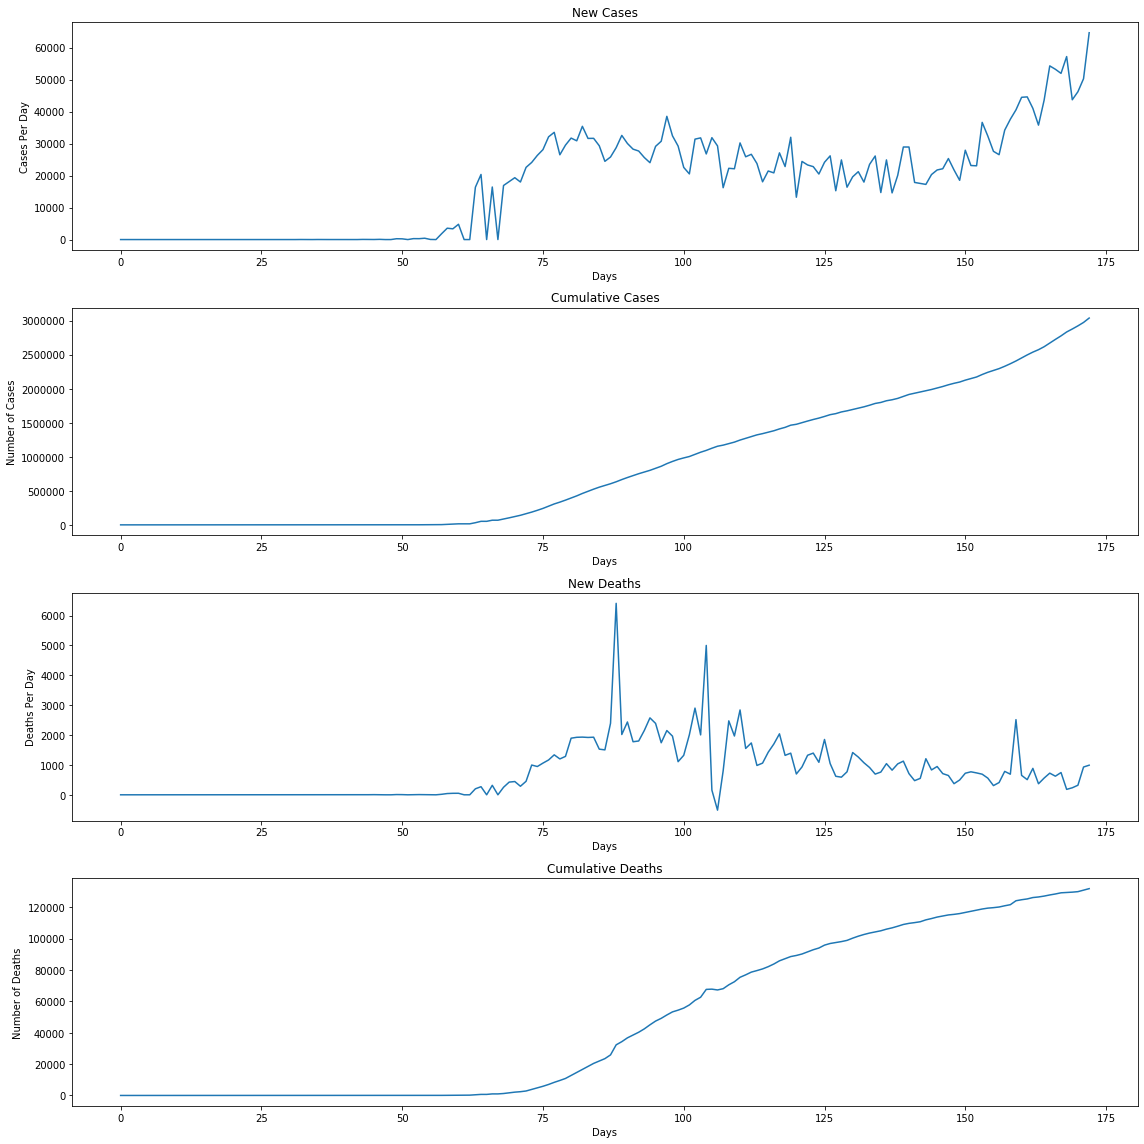

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_US_data():

    data = pd.read_csv('COVIDDATA.csv')
    data = data.to_numpy()
    
    notUS = True
    startindex = 0
    while notUS:
        if data[startindex,1] == "US":
            notUS = False
        else:
            startindex += 1
            
    isUS = True
    endindex = startindex
    while isUS:
        if data[endindex,1] == "US":
            endindex += 1
        else:
            isUS = False
    
    USData = data[startindex:endindex]
    return USData

#covid data from january 20th to july 10th 2020
USData = get_US_data()

newcases = USData[:,4]
cumcases = USData[:,5]
newdeaths = USData[:,6]
cumdeaths = USData[:,7]

NC = newcases.astype(int)
CC = cumcases.astype(int)
ND = newdeaths.astype(int)
CD = cumdeaths.astype(int)

plt.figure(figsize=(16, 16))
plt.subplot(411)
plt.plot(NC)
plt.ylabel("Cases Per Day")
plt.xlabel("Days")
plt.title("New Cases")
plt.subplot(412)
plt.plot(CC)
plt.ylabel("Number of Cases")
plt.xlabel("Days")
plt.title("Cumulative Cases")
plt.subplot(413)
plt.plot(ND)
plt.ylabel("Deaths Per Day")
plt.xlabel("Days")
plt.title("New Deaths")
plt.subplot(414)
plt.plot(CD)
plt.ylabel("Number of Deaths")
plt.xlabel("Days")
plt.title("Cumulative Deaths")
plt.tight_layout()